# Latar BelakangTransjakarta berusaha menganalisa apakah diperlukan pertambahan armada atau tidak di trayek tertentu
Sebuah perusahaan Transjakarta ingin menambah dan mengurangi trayek Transjakarta. Transjakarta ingin mengoptimalkan pelayanan transportasi umum yaitu BRT, Mikrotrans, dan Angkutan Umum Terintegrasi. Sebagai Data Analyst kita dituntut untuk menyajikan data kepada User untuk pertimangan trayek mana yang harus dikurangi atau ditambahkan


## Pernyataan Masalah
Perusahaan ingin mengetahui apakah diperlukan pertambahan armada atau tidak di trayek tertentu. Informasi ini akan membantu perusahaan untuk mengoptimalkan pelayanan Transportasi umum

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

**Trayek Manakah yang akan ditambahkan armada Transjakarta**

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import plotly.express as px
from scipy.stats import mannwhitneyu

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi dalam tahun 2021 terkait demografis transportasi Transjakarta sesuai dengan tujuan masing-masing jenis kendaraannya. Ada 6 kolom dalam dataset TransJakarta Passengers 2021, yaitu:

1) tahun: keterangan tahun dari perjalanan trayek TransJakarta
2) bulan: keterangan bulan dari perjalanan trayek TransJakarta
3) jenis: jenis kendaraan dari TransJakarta
4) kode_trayek: kode trayek yang memudahkan Pengguna Transjakarta mengetahui trayek atau tujuannya
5) trayek: rute perjalanan TransJakarta
6) jumlah_penumpang: jumlah orang yang menggunakan TransJakarta

Berikut 5 data teratas dan terbawah dari data TransJakarta Passengers 2021

In [3]:
df = pd.read_csv('TransJakarta_Passengers_2021.csv')
display(df.head(),df.tail())

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
0,2021,10,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197
1,2021,10,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711
2,2021,10,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,40186
3,2021,10,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,61883
4,2021,10,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,66616


,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
1468,2021,11,Angkutan Umum Integrasi,11Q,Kampung Melayu - Pulo Gebang via BKT,11353
1469,2021,11,Angkutan Umum Integrasi,11D,Pulo Gebang - Pulo Gadung 2 via PIK,59155
1470,2021,11,Angkutan Umum Integrasi,10K,Tanjung Priok - Senen via Taman BMW,34498
1471,2021,11,Angkutan Umum Integrasi,GR4,Taman Kota Intan - Museum Bahari,4
1472,2021,11,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,3


## Data Understanding and Cleaning

Kita dapat melakukan Data Understanding and Cleaning unuk mendapatkan berbagai anomali pada data yang akan kita gunakan agar mendapatkan hasil yang optimal, sehingga kita dapat menangani anomali tersebut.


Pertama, mari kita lihat informasi umum dari dataset TransJakarta Passengers 2021

In [4]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}\n')
df.info()

Jumlah baris dan kolom di dataset df adalah (1473, 6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tahun             1473 non-null   int64 
 1   bulan             1473 non-null   int64 
 2   jenis             1473 non-null   object
 3   kode_trayek       1473 non-null   object
 4   trayek            1471 non-null   object
 5   jumlah_penumpang  1473 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 69.2+ KB


In [5]:
display(df.describe(), df.describe(include='object'))

,tahun,bulan,jumlah_penumpang
count,1473.0,1473.000000,1.473000e+03
mean,2021.0,6.534963,8.167586e+04
std,0.0,3.446451,1.265331e+05
min,2021.0,1.000000,0.000000e+00
25%,2021.0,4.000000,2.501600e+04
50%,2021.0,7.000000,4.962800e+04
75%,2021.0,10.000000,7.513800e+04
max,2021.0,12.000000,1.131439e+06


,jenis,kode_trayek,trayek
count,1473,1473,1471
unique,3,135,136
top,Mikrotrans,JAK.88,Cililitan - Condet via Kayu Manis
freq,848,12,24


In [6]:
display(df.isna().sum())

tahun               0
bulan               0
jenis               0
kode_trayek         0
trayek              2
jumlah_penumpang    0
dtype: int64

In [7]:
df[df.isnull().any(axis=1)]

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
795,2021,12,Mikrotrans,JAK.10B,NaN,4085
796,2021,12,Mikrotrans,JAK.10A,NaN,33992


Dari data diatas, kita bisa melihat bahwa:
1) Dataset Transjakarta Passengers 2021 memiliki 1473 baris dan 6 kolom
2) Terdapat data kosong pada kolom `trayek` yaitu dengan isi datanya adalah `NaN`. Pada index ke 795 dan 796.
3) Top Frekuensi ada pada jenis kendaraaan `Mikrotrans` dengan `kode_trayek` JAK.88 dengan rute `trayek` Cililitan - Condet via Kayu Manis

Dengan latar belakang TransJakarta dalam tahap pengembangan kita dapat menyimpulkan:
1) Pada kode trayek JAK.10B dan JAK.10A hanya memiliki data di Bulan 12 yaitu di akhir tahun 2021
2) Kita dapat berasumsi bahwa Jenis kendaraang Mikrotrans dengan kode trayek tersebut adalah trayek baru
sehingga dari data analisa tersebut kita dapat mengisi missing values pada kolom `trayek` tersebut dengan nilai `rute_baru`

# FILLNA
Tahap selanjutnya kita dapat mengisi missing values tersebut dengan nilai yang baru

In [8]:
# mengisi missing values dengan nilai 'rute_baru' 
rute_baru = df['trayek'].fillna('rute_baru',inplace = True)
rute_baru

In [9]:
# mengecek apakah missing values tersebut sudah terisi dengan nilai baru
df.loc[795:797]

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
795,2021,12,Mikrotrans,JAK.10B,rute_baru,4085
796,2021,12,Mikrotrans,JAK.10A,rute_baru,33992
797,2021,12,Mikrotrans,JAK.10,Tanah Abang - Kota,62581


### Data Clean
Crosscheck kembali bahwa Missing Values dari data awal sudah tidak ada

In [68]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique()])
    
dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique'],
                     data=listItem)
print(df.shape)
dfDesc

(1473, 6)


,dataFeatures,dataType,null,unique
0,tahun,int64,0,1
1,bulan,int64,0,12
2,jenis,object,0,3
3,kode_trayek,object,0,135
4,trayek,object,0,137
5,jumlah_penumpang,int64,0,1420


# Data Analysis
kita sudah melakukan Data Cleaning, selanjutnya kita dapat melakukan Analisa terhadap trayek Transjakarta yang memiliki peminat paling banyak dan paling sedikit, sehingga kita dapat mengoptimalkan transportasi umum untuk masyarakat kota Jakarta

In [57]:
df['jumlah_penumpang'].max()

1131439

In [59]:
df['trayek'].value_counts()

Cililitan - Condet via Kayu Manis              24
Terminal Tanjung Priok - Ancol Barat           12
Batu Sari-Tanah Abang                          12
Kebayoran Lama - Jelambar                      12
Blok M - Kota                                  12
                                               ..
Ragunan - Departemen Pertanian                  1
Kampung Melayu - Pulo Gadung                    1
Gondangdia - Cikini via Kramat Jaya             1
Dukuh Atas - Casablanca via Epicentrum Raya     1
Pelabuhan Kaliadem - Kota                       1
Name: trayek, Length: 137, dtype: int64

In [62]:
trayek_cili.describe(include = 'object')

,jenis,kode_trayek,trayek
count,24,24,24
unique,1,2,1
top,Mikrotrans,JAK.37,Cililitan - Condet via Kayu Manis
freq,24,12,24


Dari di atas, kita dapat memilih trayek `Cililitan - Condet via Kayu Manis` dengan total 24 keberengkatan selama 12 bulan di tahun 2021 sehingga kita akan memilih trayek `Cililitan - Condet via Kayu Manis` untuk dapat dilakukan analisa lebih lanjut.

# Variabel khusus yang ingin diteliti

Membuat sebuah variabel khusus untuk meneliti `trayek` `Cililitan - Condet via Kayu Manis` agar mendapatkan hasil yang lebih maksimal dalam uji testing dan grafik

In [23]:
trayek_cili = df[df['trayek'] == 'Cililitan - Condet via Kayu Manis'].sort_values(by = 'bulan')
trayek_cili

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
522,2021,1,Mikrotrans,JAK.37,Cililitan - Condet via Kayu Manis,46026
542,2021,1,Mikrotrans,JAK.16,Cililitan - Condet via Kayu Manis,55944
1011,2021,2,Mikrotrans,JAK.37,Cililitan - Condet via Kayu Manis,48742
1031,2021,2,Mikrotrans,JAK.16,Cililitan - Condet via Kayu Manis,55253
276,2021,3,Mikrotrans,JAK.37,Cililitan - Condet via Kayu Manis,62773
296,2021,3,Mikrotrans,JAK.16,Cililitan - Condet via Kayu Manis,76307
1276,2021,4,Mikrotrans,JAK.16,Cililitan - Condet via Kayu Manis,76238
1256,2021,4,Mikrotrans,JAK.37,Cililitan - Condet via Kayu Manis,59481
642,2021,5,Mikrotrans,JAK.37,Cililitan - Condet via Kayu Manis,58115
662,2021,5,Mikrotrans,JAK.16,Cililitan - Condet via Kayu Manis,71832


In [70]:
df_gabung = df.groupby(['tahun', 'bulan', 'jenis', 'trayek'])['jumlah_penumpang'].sum().reset_index()
trayek_cili = df_gabung[df_gabung['trayek'] == 'Cililitan - Condet via Kayu Manis'].sort_values(by = 'bulan')
trayek_cili

,tahun,bulan,jenis,trayek,jumlah_penumpang
58,2021,1,Mikrotrans,Cililitan - Condet via Kayu Manis,101970
176,2021,2,Mikrotrans,Cililitan - Condet via Kayu Manis,103995
297,2021,3,Mikrotrans,Cililitan - Condet via Kayu Manis,139080
418,2021,4,Mikrotrans,Cililitan - Condet via Kayu Manis,135719
542,2021,5,Mikrotrans,Cililitan - Condet via Kayu Manis,129947
663,2021,6,Mikrotrans,Cililitan - Condet via Kayu Manis,133190
786,2021,7,Mikrotrans,Cililitan - Condet via Kayu Manis,111560
909,2021,8,Mikrotrans,Cililitan - Condet via Kayu Manis,86072
1030,2021,9,Mikrotrans,Cililitan - Condet via Kayu Manis,98989
1151,2021,10,Mikrotrans,Cililitan - Condet via Kayu Manis,142314


# Grafik Line Plot dan Bar Plot
Lalu kita akan membuat grafik dari data tersebut untuk melihat visualisai pergerakan jumlah penumpang setiap bulannya dengan lineplot dan bar plot

Text(0.5, 1.0, 'Jumlah Penumpang Trayek Cililitan - Condet via Kayu Manis')

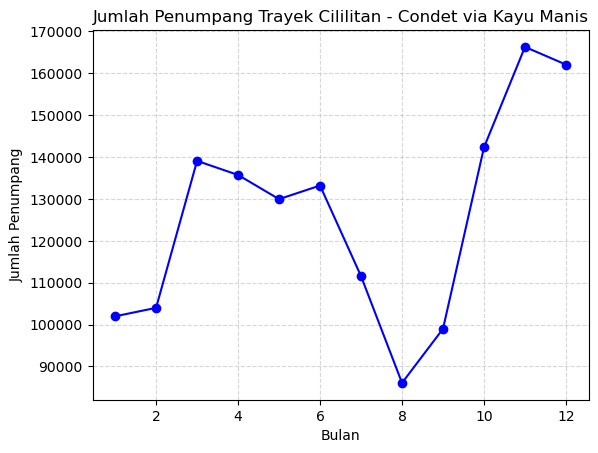

In [13]:
plt.plot(trayek_cili['bulan'], trayek_cili['jumlah_penumpang'], marker='o', linestyle='-', color='blue')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penumpang')
plt.grid(True, linestyle='--', alpha=0.5)
plt.title('Jumlah Penumpang Trayek Cililitan - Condet via Kayu Manis')

Text(0.5, 1.0, 'Jumlah Penumpang Trayek Cililitan - Condet via Kayu Manis')

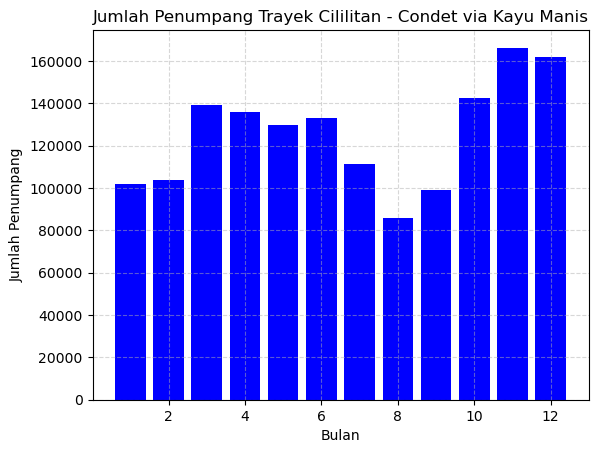

In [14]:
plt.bar(trayek_cili['bulan'], trayek_cili['jumlah_penumpang'], color='blue')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penumpang')
plt.grid(True, linestyle='--', alpha=0.5)
plt.title('Jumlah Penumpang Trayek Cililitan - Condet via Kayu Manis')

# Uji Mann Whitney

Dalam hasil Uji Mann-Whitney yang Anda berikan, nilai Uji U adalah 41.0 dan nilai p-value adalah 0.4148860293025053.

Berdasarkan hasil ini, Anda dapat menyimpulkan bahwa tidak ada perbedaan yang signifikan antara jumlah penumpang dalam kelompok 1 (bulan 1-6) dan kelompok 2 (bulan 7-12) pada trayek Cililitan - Condet via Kayu Manis dan selalu mengalami kenaikan.

In [37]:
jumlah_penumpang1 = trayek_cili['jumlah_penumpang'][:6]
jumlah_penumpang2 = trayek_cili['jumlah_penumpang'][6:]

U, mw_p_value = stats.mannwhitneyu(jumlah_penumpang1, jumlah_penumpang2, alternative='two-sided')

if mw_p_value > 0.05:
  print(f'P-Value: {mw_p_value}, Dibutuhkan penambahan armada pada trayek Cililitan - Condet via Kayu Manis')
else:
  print(f'P-Value: {mw_p_value}, Tidak dibutuhkan penambahan armada pada trayek Cililitan - Condet via Kayu Manis')

P-Value: 0.4148860293025053, Dibutuhkan penambahan armada pada trayek Cililitan - Condet via Kayu Manis


# Linear Regression
kemudian untuk meyakinkan perusahaan terkait penambahan armada, 
saya menganalisa tingkat kemiringan dari bulan 1 ke bulan 12 apakah memang benar terjadi kenaikan atau uptrend di trayek tersebut

In [16]:
from scipy.stats import linregress
x = trayek_cili['bulan']
y = trayek_cili['jumlah_penumpang']

# Regresi linier
slope, intercept, r_value, p_value, std_err = linregress(x, y)

print("Tingkat Kemiringan/ Linear Regression:", slope)

Tingkat kemiringan: 3172.5454545454545


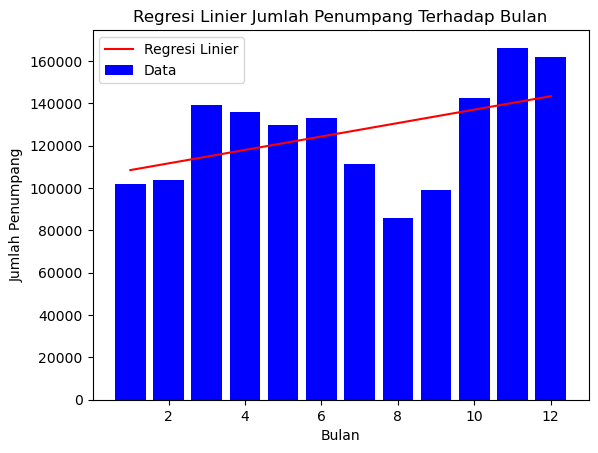

In [18]:
plt.bar(x, y, color='blue', label='Data')
plt.plot(x, intercept + slope * x, color='red', label='Regresi Linier')

# Set label dan judul
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penumpang')
plt.title('Regresi Linier Jumlah Penumpang Terhadap Bulan')
# Menampilkan legenda
plt.legend()
# Menampilkan plot
plt.show()

# Kesimpulan dan Rekomendasi

Dari analisis yang telah dilakukan, kita bisa membuat kesilpulan berikut tetang trayek yang ingin ditambahkan:

- Jenis kendaraan terbanyak keberangkatannya adalah Mikrotrans
- Dari di atas, trayek `Cililitan - Condet via Kayu Manis` adalah trayek paling banyak dengan total 24 keberangkatan selama 12 bulan di tahun 2021
- Keberangkatan dengan jumlah penumpang paling sedikit adalah pada bulan 8 dengan total penumpang 86072
- Keberangkatan dengan jumlah penumpang paling banyak adalah pada bulan 12 dengan total penumpang 162063
- Nilai Uji U (U-statistic) adalah nilai statistik yang digunakan dalam Uji Mann-Whitney. Nilai ini menunjukkan jumlah peringkat yang lebih rendah dari salah satu kelompok dalam perbandingan dengan kelompok lainnya. Dalam kasus ini, nilai Uji U adalah 41.0, yang mengindikasikan jumlah peringkat yang lebih rendah dari kelompok 1 dibandingkan dengan kelompok 2.

- Nilai p-value adalah nilai probabilitas yang menunjukkan signifikansi statistik dari perbedaan antara kedua kelompok. Dalam kasus ini, nilai p-value adalah 0.4148860293025053, yang menunjukkan tingkat signifikansi sebesar 0.4148860293025053 atau sekitar 41.49%. Jika nilai p-value lebih besar dari tingkat signifikansi yang ditetapkan sebelumnya (misalnya 0.05), maka tidak ada cukup bukti untuk menolak hipotesis nol, yang berarti tidak ada perbedaan yang signifikan antara kedua kelompok dalam hal jumlah penumpang.

## Rekomendasi

- Dalam hasil Uji Mann-Whitney, nilai Uji U adalah 41.0 dan nilai p-value adalah 0.4148860293025053 dan dianjurkan untuk menerima H0 yaitu `Dibutuhkan penambahan armada pada trayek Cililitan - Condet via Kayu Manis`.
- Terjadi kenaikan tren setiap bulannya sehingga penumpang akan lebih banyak di tahun 2022 dengan trayek `Cililitan - Condet via Kayu Manis`
- Dibutuhkan penambahan armada Mikrotrans di trayek `Cililitan - Condet via Kayu Manis`
- Mengalokasikan Mikrotrans di bulan 11 dan bulan 12 lebih banyak dikarenakan kenaikan jumlah penumpang yang tinggi

Dengan data tersebut Perusahaan dapat mengurangi biaya operasional perusahaan jika secara tiba-tiba terdapat lonjakan jumlah penumpang di trayek `Cililitan - Condet via Kayu Manis` dengan mengalokasikan Mikrotrans yang berada pada pool mikrotrans dengan tarif minimal Rp 5.000,- dengan pendapatan perbulan Rp 810.315.000,- diharapkan dapat menjadi acuan untuk mendapatkan keuntungan bagi perusahaan
